## **Linear Regression**
 The aim of this exercise is to predict house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consists of historic data of houses sold between May 2014 to May 2015.

 You have to build a Linear Regression model with the features mentioned in the later part of the assignment

In [15]:
ans=[0]*10

### **Data Understanding and Importing libraries**

### **Import necessary libraries**
+ Numpy
+ Pandas
+ Sklearn

In [16]:
# Import important libraries library
###YOUR CODE HERE###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

###END###
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#### **Import the dataset provided along the exercise (kc_house_data.csv) and look for the top 5 rows of the data**

In [17]:
###YOUR CODE HERE###
df = pd.read_csv('kc_house_data.csv')
###END###

In [18]:
#Take information about the data
###YOUR CODE HERE###
df.head()
###END###

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Text(0.5, 1.0, 'HISTOGRAM')

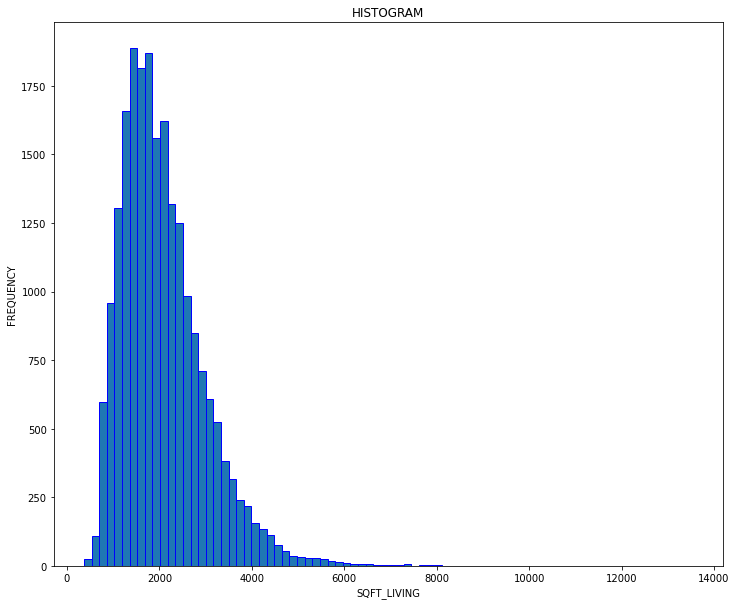

In [19]:
#PLOT HISTOGRAM
###YOUR CODE HERE###
figure, ax = plt.subplots(figsize= (12, 10))
ax.hist(df['sqft_living'], bins=80, edgecolor='b')
ax.set_xlabel('SQFT_LIVING')
ax.set_ylabel('FREQUENCY')
ax.set_title('HISTOGRAM')
###END###

### **Linear Regression using single feature**

#### **Take 'sqft_living' as the feature vector and 'price' as the ouput vector.**
Now plot X vs Y

In [20]:
###YOUR CODE HERE###
x = df['sqft_living']
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
###END###

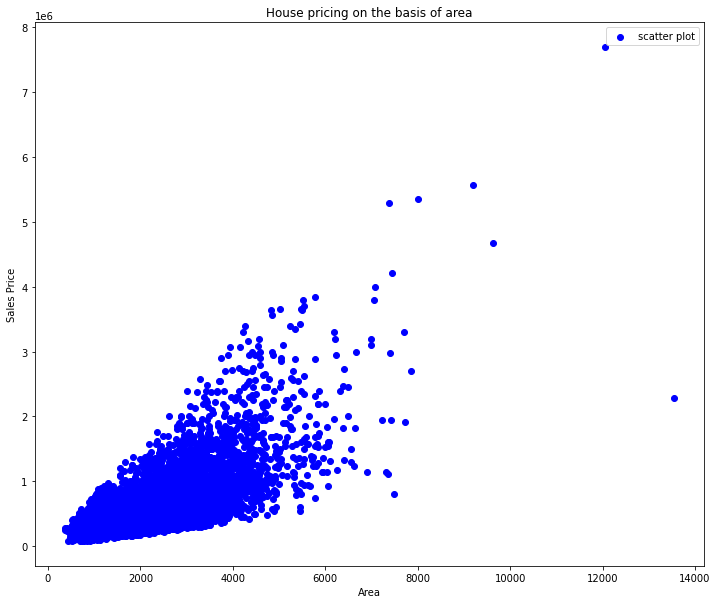

In [21]:
# Visualize the feature varible on scatter plot, include labels and legend
figure, ax = plt.subplots(figsize= (12, 10))
ax.scatter(x_train,y_train, color='blue')
ax.set_xlabel('Area')
ax.set_ylabel('Sales Price')
ax.set_title('House pricing on the basis of area')
plt.legend(['scatter plot']);

Find the slope and intercept using basic numpy library.
Here b1 is the slope and b0 is the index.
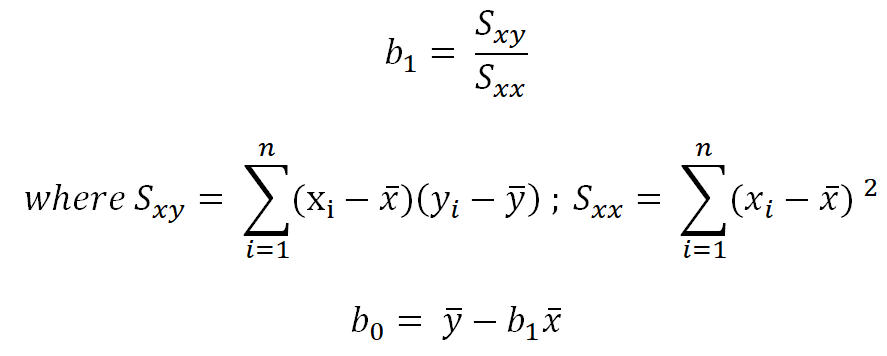

Calculate w and b for one feature problem using the above formula

In [22]:
# Find out value of slop and intercept
# Finding X_mean and y_mean

###YOUR CODE HERE###
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)

S_xy = np.sum((x_train - x_mean)*(y_train - y_mean))
S_xx = np.sum((x_train - x_mean)*(x_train - x_mean))

b1 = S_xy / S_xx
b0 = y_mean - b1 * x_mean

###END###

In [23]:
#You have to put slope as ans[0] and intercept as ans[1]
#ans[0]=w[0] 
#ans[1]=b[0]
ans[0] = b1
ans[1] = b0

w = []
w.append(b1)

b = []
b.append(b0)

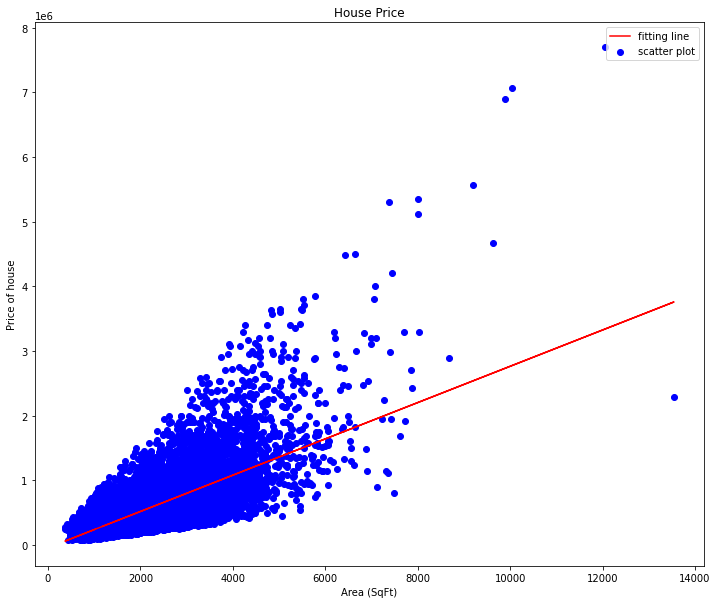

In [24]:
# Find the equation of line(Fitting line) and draw it on scater plot feture variable
# Make a figure with axis 
figure1, ax =plt.subplots(figsize= (12, 10))

# Plot feature
ax.scatter(x, y, color='blue')

# Set title and axis labels
ax.set_title('House Price')
ax.set_xlabel('Area (SqFt)')
ax.set_ylabel('Price of house')

# Plot fitting line
y_axis = w* x + b
ax.plot(x, y_axis, color='red')

# Set Legends
ax.legend(labels=['fitting line', 'scatter plot']);

### **Linear Regression of multiple features using sklearn**

This is the implementation for understanding.[Reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

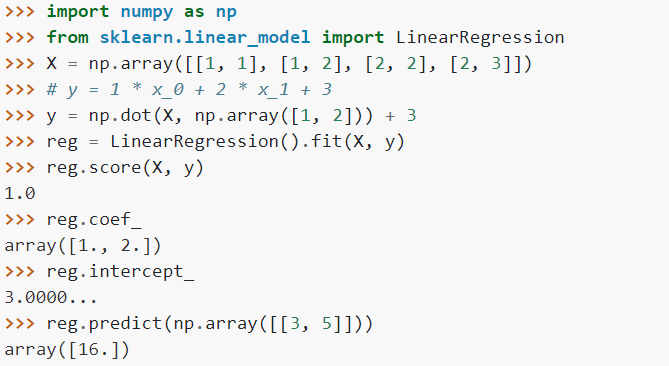



#### **Make the Regression model using sklearn library function**

We would be using the following three parameters:
+ 'sqft_living'
+ 'condition'
+ 'bedrooms'

In [25]:
from sklearn.linear_model import LinearRegression
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg = LinearRegression()

### You have to write the code for calculating w and b for 3 features problem
###YOUR CODE HERE###

features_list = ["sqft_living","condition","bedrooms"]
x_train = train_data[features_list]
y_train = train_data['price']

x_test = test_data[features_list]
y_test = test_data['price']


reg.fit(x_train, y_train)
    
w = reg.coef_
b = reg.intercept_
pred = reg.predict(x_test)

###END###

mean_squared_error=metrics.mean_squared_error(y_test,pred)

**Score function**

```python
score(X, y, sample_weight=None)
```



Return the coefficient of determination $R^2$ of the prediction.

The coefficient $R^2$ is defined as $(1-u/v)$
 
, where $u$ is the residual sum of squares ((y_true - y_pred) ** 2).sum() and $v$  is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.



You have to store the answers as below
**!Important** Do not store list as your answer only store number.

e.g. 
-- If you have a 1x1 array then store a[0,0]

-- If you have a list of single number then store a[0] 
+ ans[2] - **SquareRoot** of Mean Squared error on test set
+ ans[3] - Score on train set. Can calculate using reg.score() function
+ ans[4] - Score on test set.
+ ans[5] - Intercept value (b)
+ ans[6] - w[1] coefficient of first feature
+ ans[7] - w[2] coefficient of second feature
+ ans[8] - w[3] coefficient of third feature

 

In [26]:
ans[2]=round(np.sqrt(mean_squared_error),2)
print('Sqaured mean error',ans[3] )
ans[3]=round(reg.score(x_train,y_train),3)
print('R squared training',ans[3])
ans[4]=round(reg.score(x_test,y_test),3)
print('R sqaured testing',ans[4] )
ans[5]=reg.intercept_
print('intercept',ans[6])
ans[6]=reg.coef_[0]
ans[7]=reg.coef_[1]
ans[8]=reg.coef_[2]

print('coefficient_1',ans[7])
print('coefficient_2',ans[8])
print('coefficient_3',ans[9])


Sqaured mean error 0
R squared training 0.522
R sqaured testing 0.486
intercept 0
coefficient_1 49904.52717399829
coefficient_2 -61267.3424988903
coefficient_3 0


In [27]:
##do not change this code
import json
ans = [str(item) for item in ans]

filename = "mansinumber1@gmail.com_Mansi_Uniyal_LinearRegression"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LinearRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [28]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'mansinumber1@gmail.com_Mansi_Uniyal_LinearRegression',
 'status': 'Success'}
